local maxima frequencies


C:\Users\kadde\anaconda3\Lib\site-packages\statsmodels\sandbox\tsa\try_arma_more.py:100: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  xacov = acovf(x, unbiased=False)
C:\Users\kadde\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\kadde\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


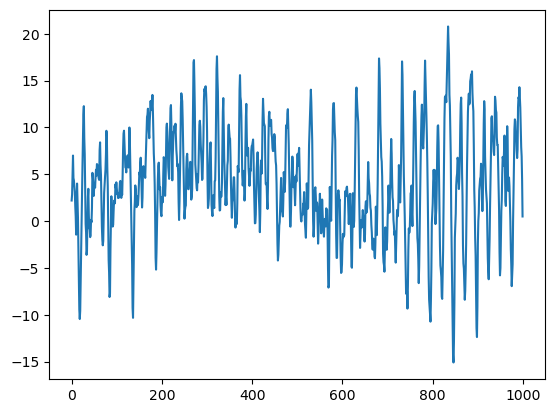

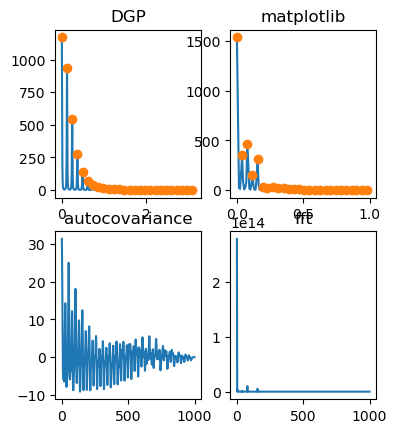

In [1]:
from keras.src.utils.module_utils import tensorflow
from statsmodels.sandbox.tsa.try_arma_more import rescale
# Importing the Keras Libs

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Dense

In [2]:
# Initialising the CNN
classifier = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(128, activation='relu'),
    tensorflow.keras.layers.Dense(1, activation='sigmoid')
])


C:\Users\kadde\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [4]:
# Part 2 - Fitting the CNN to the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [5]:
training_set = train_datagen.flow_from_directory("datasets\\training_set",
                                                 target_size= (64,64),
                                                 batch_size= 32,
                                                 class_mode= 'binary')

Found 8000 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory("datasets\\test_set",
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode='binary')

Found 2000 images belonging to 2 classes.


In [7]:
# Define a simple CNN model
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(128, activation='relu'),
    tensorflow.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
classifier.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=25,
    validation_data= test_set,
    validation_steps=len(test_set)
)

C:\Users\kadde\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 178ms/step - accuracy: 0.5659 - loss: 0.8007 - val_accuracy: 0.6620 - val_loss: 0.6271
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.6681 - loss: 0.6149 - val_accuracy: 0.6705 - val_loss: 0.6326
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 155ms/step - accuracy: 0.7096 - loss: 0.5683 - val_accuracy: 0.6845 - val_loss: 0.5999
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 158ms/step - accuracy: 0.7211 - loss: 0.5440 - val_accuracy: 0.7370 - val_loss: 0.5440
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 157ms/step - accuracy: 0.7279 - loss: 0.5343 - val_accuracy: 0.6760 - val_loss: 0.6505
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.7451 - loss: 0.5195 - val_accuracy: 0.7240 - val_loss: 0.5491
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.7438 - loss: 0.5142 - val_accuracy: 0.7245 - val_loss: 0.5874
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 164ms/step - accuracy: 0.7478 - loss: 0

In [9]:
# Making Prediction

import numpy as np
from keras.preprocessing import image

test_image = image.load_img('datasets/single_prediction/cat_or_dog_1.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
dog


In [11]:
# Making Prediction

import numpy as np
from keras.preprocessing import image

test_image = image.load_img('datasets/single_prediction/cat_or_dog_2.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
print(result)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[1.]]
dog


In [12]:
# Save the model in HDF5 format
classifier.save('cat_dog_model.h5')  # Saves as 'cat_dog_model.h5' in the current folder